In [1]:
import pandas as pd
import numpy as np

# 파일 경로 리스트
file_paths = [
   '/Users/foxrainswap/Desktop/캡스톤_코드/1112/SARIMA_결과/sarima_predictions_weekday.csv',
   '/Users/foxrainswap/Desktop/캡스톤_코드/1112/SARIMA_결과/sarima_predictions_sunday.csv',
   '/Users/foxrainswap/Desktop/캡스톤_코드/1112/SARIMA_결과/sarima_predictions_saturday.csv'
]

# 각 파일에 대해 처리
for file_path in file_paths:
   # 데이터 로드
   df = pd.read_csv(file_path)
   
   # 시간 컬럼들 (정류장순번, 정류장명 제외)
   time_columns = [col for col in df.columns if col not in ['정류장순번', '정류장명']]
   
   # 각 시간 컬럼에 대해:
   # 1. 음수를 0으로 변경
   # 2. 나머지 값들을 반올림하여 정수로 변환
   for col in time_columns:
       df[col] = df[col].apply(lambda x: max(0, round(x)))
   
   # 새 파일명 생성 (경로 분리 후 '완' 추가)
   path_parts = file_path.rsplit('/', 1)
   new_file_path = path_parts[0] + '/(완)' + path_parts[1]
   
   # 변환된 데이터 저장
   df.to_csv(new_file_path, index=False)
   print(f"처리 완료: {new_file_path}")
   
   # 확인을 위해 첫 몇 행 출력
   print("\n변환된 데이터 확인 (첫 3행):")
   print(df.head(3))
   print("\n" + "="*50 + "\n")

처리 완료: /Users/foxrainswap/Desktop/캡스톤_코드/1112/SARIMA_결과/(완)sarima_predictions_weekday.csv

변환된 데이터 확인 (첫 3행):
   정류장순번        정류장명  04시  05시  06시  07시  08시  09시  10시  11시  ...  18시  19시  \
0      0      경희대차고지    0    0    0    0    0    0    0    0  ...    0    0   
1      1       사색의광장    0    0    0    0    0    0    0    0  ...    0    0   
2      2  생명과학대.산업대학    0    0    0    0    0    0    0    0  ...    0    0   

   20시  21시  22시  23시  00시  01시  02시  03시  
0    0    0    0    0    0    0    0    0  
1    0    0    0    0    0    0    0    0  
2    0    0    0    0    0    0    0    0  

[3 rows x 26 columns]


처리 완료: /Users/foxrainswap/Desktop/캡스톤_코드/1112/SARIMA_결과/(완)sarima_predictions_sunday.csv

변환된 데이터 확인 (첫 3행):
   정류장순번        정류장명  04시  05시  06시  07시  08시  09시  10시  11시  ...  18시  19시  \
0      0      경희대차고지    0    0    0    0    0    0    0    0  ...    0    0   
1      1       사색의광장    1    0    0    1    0    1    0    0  ...    0    0   
2      2  생명과학대.산업대학    0 

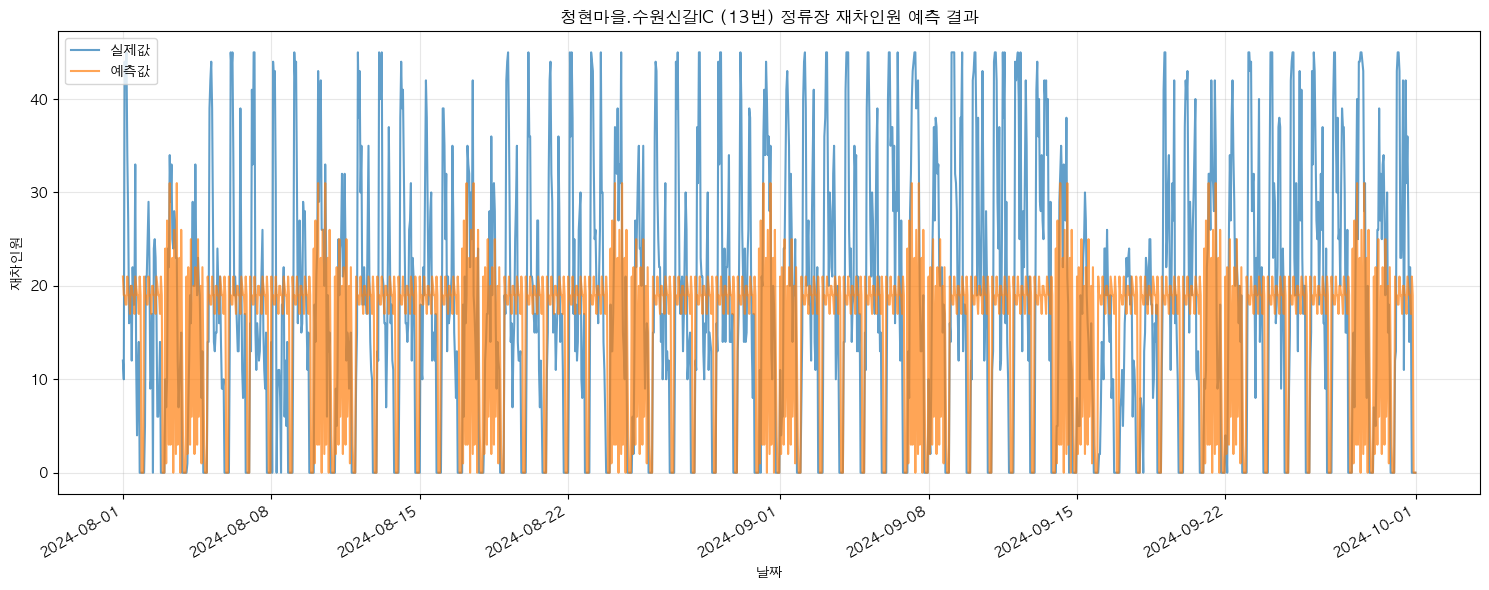

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 한글 폰트 설정
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
test_data = pd.read_csv('/Users/foxrainswap/Desktop/데이터/재차인원/1112/합본/테스트셋_정규화x.csv')
pred_weekday = pd.read_csv('/Users/foxrainswap/Desktop/캡스톤_코드/1112/SARIMA_결과/(완)sarima_predictions_weekday.csv')
pred_saturday = pd.read_csv('/Users/foxrainswap/Desktop/캡스톤_코드/1112/SARIMA_결과/(완)sarima_predictions_saturday.csv')
pred_sunday = pd.read_csv('/Users/foxrainswap/Desktop/캡스톤_코드/1112/SARIMA_결과/(완)sarima_predictions_sunday.csv')

def create_comparison_plot(station_id, station_name):
    # 해당 정류장의 테스트 데이터 필터링
    station_test = test_data[test_data['정류장순번'] == station_id].copy()
    
    # 예측 데이터 가져오기
    station_pred_weekday = pred_weekday[pred_weekday['정류장순번'] == station_id]
    station_pred_saturday = pred_saturday[pred_saturday['정류장순번'] == station_id]
    station_pred_sunday = pred_sunday[pred_sunday['정류장순번'] == station_id]
    
    # 날짜와 요일 처리
    station_test['datetime'] = pd.to_datetime(station_test['날짜'])
    station_test = station_test.sort_values('datetime')
    
    # 시간대별로 실제값과 예측값 비교
    time_columns = ['04시', '05시', '06시', '07시', '08시', '09시', '10시', 
                   '11시', '12시', '13시', '14시', '15시', '16시', '17시', 
                   '18시', '19시', '20시', '21시', '22시', '23시', '00시', 
                   '01시', '02시', '03시']
    
    # 결과를 저장할 리스트
    actual_values = []
    predicted_values = []
    dates = []
    
    for _, row in station_test.iterrows():
        date = row['datetime']
        weekday = date.weekday()
        
        # 해당 날짜의 예측값 선택
        if weekday < 5:  # 평일
            pred_values = station_pred_weekday[time_columns].values[0]
        elif weekday == 5:  # 토요일
            pred_values = station_pred_saturday[time_columns].values[0]
        else:  # 일요일
            pred_values = station_pred_sunday[time_columns].values[0]
        
        # 각 시간대의 값들을 리스트에 추가
        for hour, (actual, pred) in enumerate(zip(row[time_columns], pred_values)):
            dates.append(date + pd.Timedelta(hours=hour))
            actual_values.append(actual)
            predicted_values.append(pred)
    
    # 시각화
    plt.figure(figsize=(15, 6))
    plt.plot(dates, actual_values, label='실제값', color='#1f77b4', alpha=0.7)
    plt.plot(dates, predicted_values, label='예측값', color='#ff7f0e', alpha=0.7)
    
    plt.title(f'{station_name} ({station_id}번) 정류장 재차인원 예측 결과')
    plt.xlabel('날짜')
    plt.ylabel('재차인원')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # x축 날짜 포맷 설정
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.show()

# 예시로 특정 정류장에 대해 시각화
station_id = 13  # 원하는 정류장 번호
station_name = pred_weekday[pred_weekday['정류장순번'] == station_id]['정류장명'].iloc[0]
create_comparison_plot(station_id, station_name)

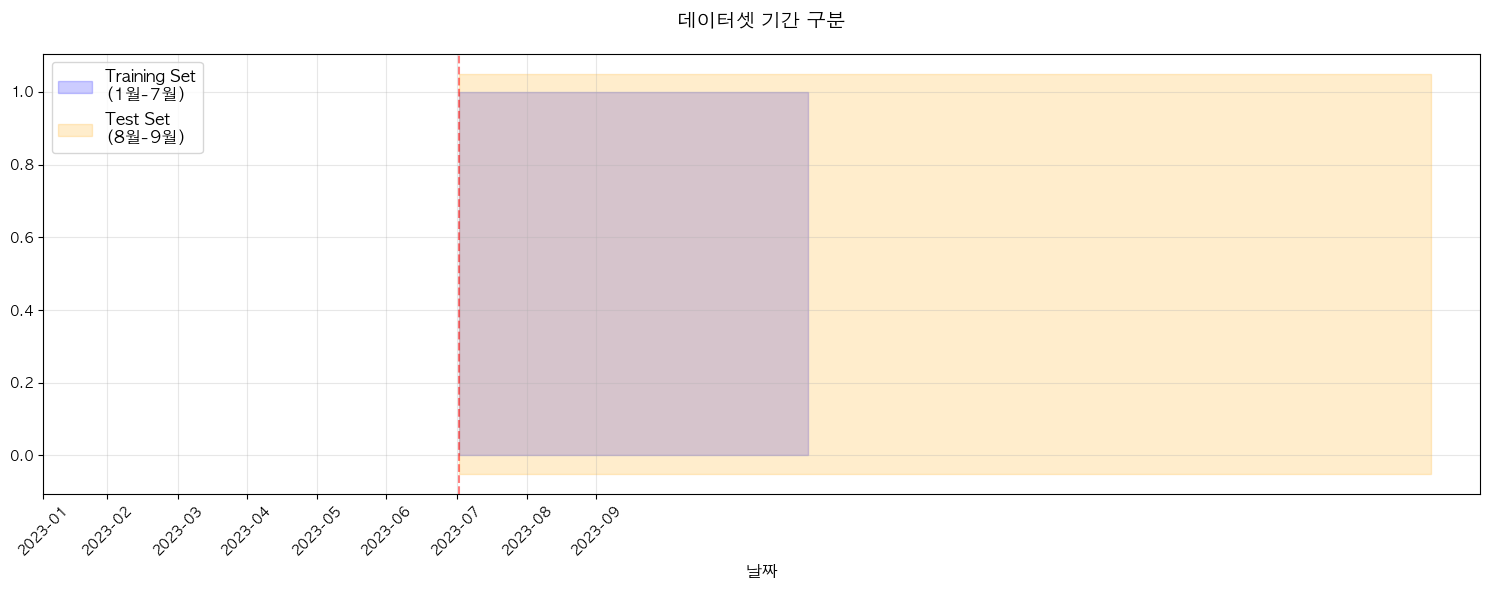

In [6]:
### 데이터셋 분리 간단한 시각화 



import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
train_data = pd.read_csv('/Users/foxrainswap/Desktop/데이터/재차인원/1112/합본/트레이닝셋_정규화x.csv')
test_data = pd.read_csv('/Users/foxrainswap/Desktop/데이터/재차인원/1112/합본/테스트셋_정규화x.csv')

# 날짜 변환
train_data['날짜'] = pd.to_datetime(train_data['날짜'])
test_data['날짜'] = pd.to_datetime(test_data['날짜'])

# 전체 기간 시각화
plt.figure(figsize=(15, 6))

# 트레이닝셋과 테스트셋 구분하여 표시
plt.axvline(x=pd.to_datetime('2023-08-01'), color='r', linestyle='--', alpha=0.5)
plt.fill_between([train_data['날짜'].min(), pd.to_datetime('2023-08-01')], 
               plt.ylim()[0], plt.ylim()[1], 
               alpha=0.2, color='blue', label='Training Set\n(1월-7월)')
plt.fill_between([pd.to_datetime('2023-08-01'), test_data['날짜'].max()], 
               plt.ylim()[0], plt.ylim()[1], 
               alpha=0.2, color='orange', label='Test Set\n(8월-9월)')

plt.title('데이터셋 기간 구분', fontsize=14, pad=20)
plt.xlabel('날짜', fontsize=12)
dates = pd.date_range(start='2023-01-01', end='2023-09-30', freq='M')
plt.xticks(dates, [d.strftime('%Y-%m') for d in dates], rotation=45)

# 범례 위치 조정
plt.legend(loc='upper left', fontsize=12)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()